In [1]:
import numpy as np
def universal_rosenbrock(f, u0, alpha, t, G, h = 10**-5):
    du = np.matrix(np.zeros(u0.shape), dtype = np.float64)
    u =  [u0] * len(t)
    fu = np.zeros( (u0.shape[0], u0.shape[0]), dtype = np.float64)
    for i, ui in enumerate(u[ : -1]):
        tau = t[i+1] - t[i]
        for j in range( u0.shape[0] ):
            for k in range( u0.shape[0] ):
                du = np.matrix( np.zeros( u0.shape ), dtype = np.float64)
                du[j] = h
                val = ( f(u[i]+du, t[i]) - f(u[i]-du, t[i]) )/(2*h)
                fu[j][k] = val[k]
        w = np.linalg.solve( (G - alpha * tau * fu.T), f( u[i], t[i] + tau/2) )
        u[i+1] = u[i] + tau*np.real(w)
    return u, t

In [2]:
from numpy import exp, sin, cos, pi
r0 = 1000.0
r1 = 9000.0
r2 = r1
r3 = r1
r4 = r1
r5 = r1
c1 = 1e-6
c2 = 2e-6
c3 = 3e-6
ub = 6.0
u0 = np.matrix([
    [0], 
    [ub*r1/(r1+r2)], 
    [ub*r1/(r1+r2)], 
    [ub], 
    [0]], dtype = np.float64)
G = np.matrix(
    [[-c1,  c1,  .0,  .0,  .0],
     [ c1, -c1,  .0,  .0,  .0],
     [ .0,  .0, -c2,  .0,  .0],
     [ .0,  .0,  .0, -c3,  c3],
     [ .0,  .0,  .0,  c3, -c3]], dtype = np.float64)
def ue(t):
    return 0.1*sin(200.0*pi*t)
def ff(u):
    return (10**-6) * (exp(u/0.026) - 1);
def F(u, t):
    r0 = 1000.0
    r1 = 9000.0
    r2 = r1
    r3 = r1
    r4 = r1
    r5 = r1
    c1 = 1e-6
    c2 = 2e-6
    c3 = 3e-6
    ub = 6.0
    return np.matrix([ [u[0]/r0 - ue(t)/r0],
                       [0.01*ff(u[1]-u[2])-ub/r2+u[1]*(1/r1+1/r2) ],
                       [u[2]/r3 - ff(u[1]-u[2])],
                       [0.99*ff(u[1]-u[2])-ub/r4+u[3]/r4],
                       [u.item(4,0)/r5] ], dtype = np.float64)

In [3]:
ans1 = universal_rosenbrock(F, u0, 1/2, np.linspace(0, 0.3, int(5000*0.3+1)), G)
ans2 = universal_rosenbrock(F, u0, (1+1j)/2, np.linspace(0, 0.3, int(5000*0.3+1)), G)

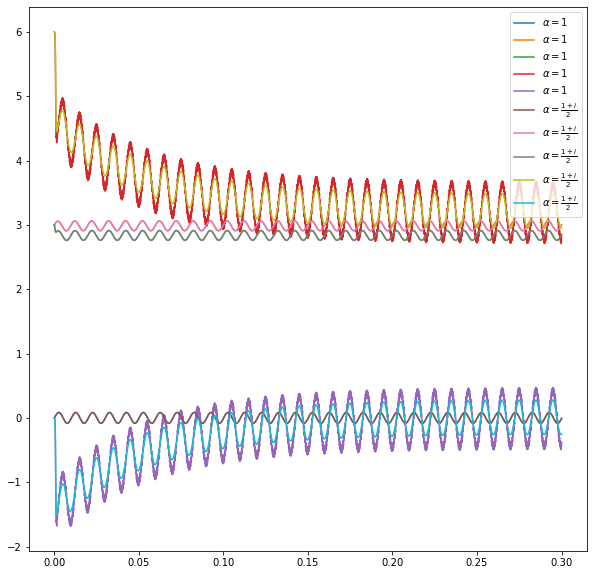

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for ans in [ans1,ans2]:
    plt.plot(ans[1],[t.item(0) for t in ans[0]])
    plt.plot(ans[1],[t.item(1) for t in ans[0]])
    plt.plot(ans[1],[t.item(2) for t in ans[0]])
    plt.plot(ans[1],[t.item(3) for t in ans[0]])
    plt.plot(ans[1],[t.item(4) for t in ans[0]])
plt.legend([r'$\alpha=1$']*5 + [r'$\alpha=\frac{1+i}{2}$']*5)

In [5]:
l = 0.01
ans11 = universal_rosenbrock(F, u0, 1/2, np.linspace(0, l, int(5000*l+1)), G)
ans21 = universal_rosenbrock(F, u0, (1+1j)/2, np.linspace(0, l, int(5000*l+1)), G)
ans12 = universal_rosenbrock(F, u0, 1/2, np.linspace(0, l, int(5000*l*2+1)), G)
ans22 = universal_rosenbrock(F, u0, (1+1j)/2, np.linspace(0, l,int(5000*l*2+1)), G)
ans13 = universal_rosenbrock(F, u0, 1/2, np.linspace(0, l, int(5000*l*4+1)), G)
ans23 = universal_rosenbrock(F, u0, (1+1j)/2, np.linspace(0, l,int(5000*l*4+1)), G)
def effective_p(U2, U1, U0, r):
    return np.log((U2-U1)/(U1-U0))/np.log(r)

<ipython-input-5-394d472b7ec5>:9: RuntimeWarning: invalid value encountered in true_divide
  return np.log((U2-U1)/(U1-U0))/np.log(r)
<ipython-input-5-394d472b7ec5>:9: RuntimeWarning: invalid value encountered in log
  return np.log((U2-U1)/(U1-U0))/np.log(r)
<ipython-input-5-394d472b7ec5>:9: RuntimeWarning: invalid value encountered in true_divide
  return np.log((U2-U1)/(U1-U0))/np.log(r)
<ipython-input-5-394d472b7ec5>:9: RuntimeWarning: invalid value encountered in log
  return np.log((U2-U1)/(U1-U0))/np.log(r)


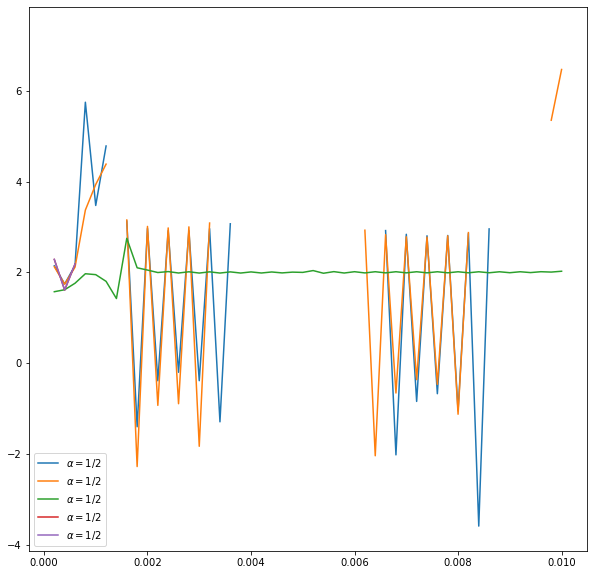

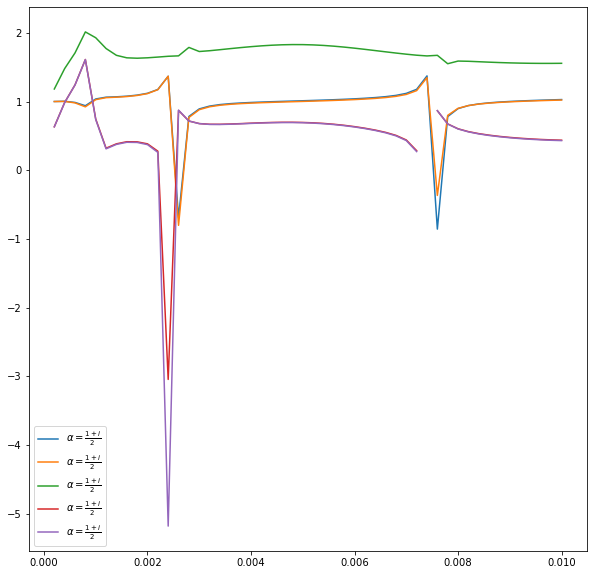

In [6]:
plt.figure(figsize = (10, 10))
ans = [effective_p(t[0], t[1], t[2], 1/2) for t in zip(ans13[0][::4],ans12[0][::2],ans11[0])]
plt.plot(ans11[1],[t.item(0) for t in ans])
plt.plot(ans11[1],[t.item(1) for t in ans])
plt.plot(ans11[1],[t.item(2) for t in ans])
plt.plot(ans11[1],[t.item(3) for t in ans])
plt.plot(ans11[1],[t.item(4) for t in ans])
plt.legend([r'$\alpha=1/2$']*5)
plt.figure(figsize = (10, 10))
ans = [effective_p(t[0], t[1], t[2], 1/2) for t in zip(ans23[0][::4],ans22[0][::2],ans21[0])]
plt.plot(ans11[1],[t.item(0) for t in ans])
plt.plot(ans11[1],[t.item(1) for t in ans])
plt.plot(ans11[1],[t.item(2) for t in ans])
plt.plot(ans11[1],[t.item(3) for t in ans])
plt.plot(ans11[1],[t.item(4) for t in ans])
plt.legend([r'$\alpha=\frac{1+i}{2}$']*5)

In [7]:
u0_a = np.matrix([
    [0], 
    [ub*r1/(r1+r2)], 
    [ub*r1/(r1+r2)], 
    [ub], 
    [0],
    [0]], dtype = np.float64)
G_a = np.matrix(
    [[-c1,  c1,  .0,  .0,  .0, .0],
     [ c1, -c1,  .0,  .0,  .0, .0],
     [ .0,  .0, -c2,  .0,  .0, .0],
     [ .0,  .0,  .0, -c3,  c3, .0],
     [ .0,  .0,  .0,  c3, -c3, .0],
     [ .0,  .0,  .0,  .0,  .0,  1]], dtype = np.float64)
def F_a(u):
    r0 = 1000.0
    r1 = 9000.0
    r2 = r1
    r3 = r1
    r4 = r1
    r5 = r1
    c1 = 1e-6
    c2 = 2e-6
    c3 = 3e-6
    ub = 6.0
    return np.matrix([ [u[0]/r0 - ue(u[-1])/r0],
                       [0.01*ff(u[1]-u[2])-ub/r2+u[1]*(1/r1+1/r2) ],
                       [u[2]/r3 - ff(u[1]-u[2])],
                       [0.99*ff(u[1]-u[2])-ub/r4+u[3]/r4],
                       [u.item(4,0)/r5],
                       [1]], dtype = np.float64)
def autonomous_rosenbrock(f, u0, alpha, t, G, h = 10**-5):
    h = 10**-5
    du = np.matrix(np.zeros(u0.shape), dtype = np.float64)
    u =  [u0] * len(t)
    fu = np.zeros( (u0.shape[0], u0.shape[0]), dtype = np.float64)
    for i, ui in enumerate(u[ : -1]):
        tau = t[i+1] - t[i]
        for j in range( u0.shape[0] ):
            for k in range( u0.shape[0] ):
                du = np.matrix( np.zeros( u0.shape ), dtype = np.float64)
                du[j] = h
                val = ( f(u[i]+du) - f(u[i]-du) )/(2*h)
                fu[j][k] = val[k]
        w = np.linalg.solve( (G - alpha * tau * fu.T), f( u[i]) )
        u[i+1] = u[i] + tau*np.real(w)
    return u, t
ans3 = autonomous_rosenbrock(F_a, u0_a, 1/2, np.linspace(0, 0.3, int(5000*0.3+1)), G_a)
ans4 = autonomous_rosenbrock(F_a, u0_a, (1+1j)/2, np.linspace(0, 0.3, int(5000*0.3+1)), G_a)

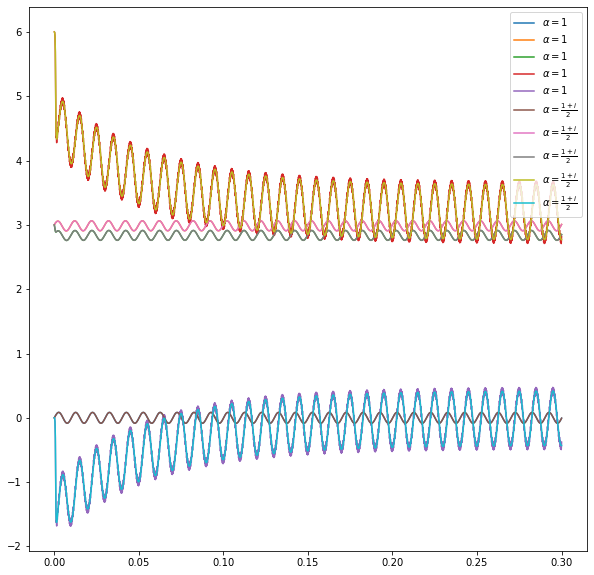

In [8]:
plt.figure(figsize = (10, 10))
for ans in [ans3,ans4]:
    plt.plot(ans[1],[t.item(0) for t in ans[0]])
    plt.plot(ans[1],[t.item(1) for t in ans[0]])
    plt.plot(ans[1],[t.item(2) for t in ans[0]])
    plt.plot(ans[1],[t.item(3) for t in ans[0]])
    plt.plot(ans[1],[t.item(4) for t in ans[0]])
plt.legend([r'$\alpha=1$']*5 + [r'$\alpha=\frac{1+i}{2}$']*5)

<ipython-input-5-394d472b7ec5>:9: RuntimeWarning: invalid value encountered in true_divide
  return np.log((U2-U1)/(U1-U0))/np.log(r)
<ipython-input-5-394d472b7ec5>:9: RuntimeWarning: invalid value encountered in log
  return np.log((U2-U1)/(U1-U0))/np.log(r)
<ipython-input-5-394d472b7ec5>:9: RuntimeWarning: invalid value encountered in true_divide
  return np.log((U2-U1)/(U1-U0))/np.log(r)
<ipython-input-5-394d472b7ec5>:9: RuntimeWarning: invalid value encountered in log
  return np.log((U2-U1)/(U1-U0))/np.log(r)


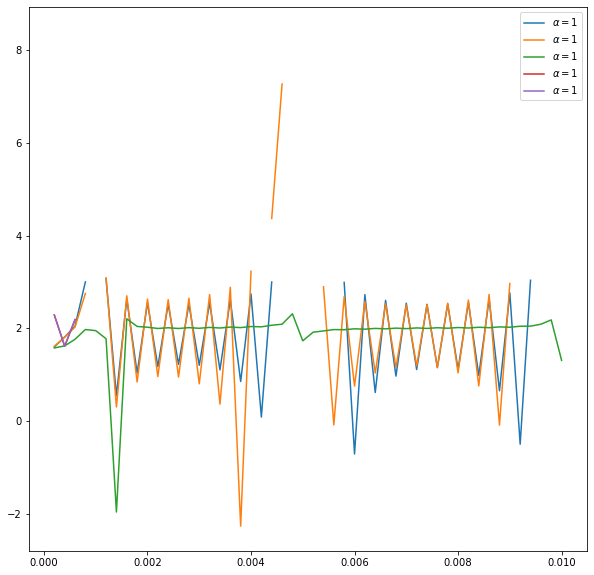

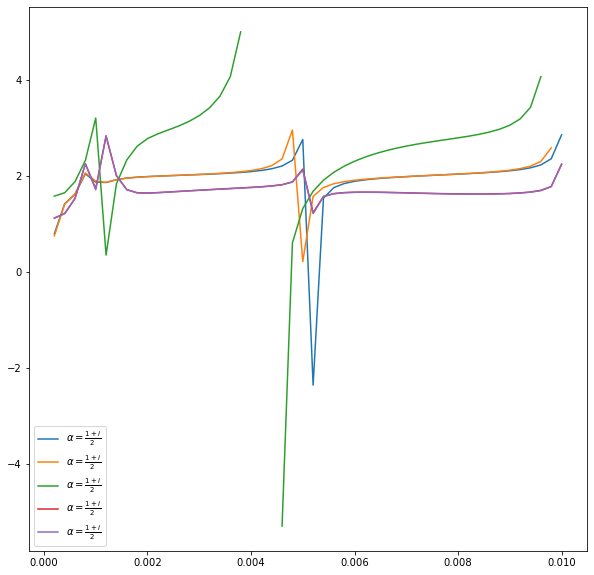

In [9]:
l = 0.01
ans11 = autonomous_rosenbrock(F_a, u0_a, 1/2, np.linspace(0, 0.01, int(5000*l+1)), G_a)
ans21 = autonomous_rosenbrock(F_a, u0_a, (1+1j)/2, np.linspace(0, 0.01, int(5000*l+1)), G_a)
ans12 = autonomous_rosenbrock(F_a, u0_a, 1/2, np.linspace(0, 0.01, int(5000*l*2+1)), G_a)
ans22 = autonomous_rosenbrock(F_a, u0_a, (1+1j)/2, np.linspace(0, 0.01, int(5000*l*2+1)), G_a)
ans13 = autonomous_rosenbrock(F_a, u0_a, 1/2, np.linspace(0, 0.01, int(5000*l*4+1)), G_a)
ans23 = autonomous_rosenbrock(F_a, u0_a, (1+1j)/2, np.linspace(0, 0.01, int(5000*l*4+1)), G_a)
plt.figure(figsize = (10, 10))
ans = [effective_p(t[0], t[1], t[2], 1/2) for t in zip(ans13[0][::4],ans12[0][::2],ans11[0])]
plt.plot(ans11[1],[t.item(0) for t in ans])
plt.plot(ans11[1],[t.item(1) for t in ans])
plt.plot(ans11[1],[t.item(2) for t in ans])
plt.plot(ans11[1],[t.item(3) for t in ans])
plt.plot(ans11[1],[t.item(4) for t in ans])
plt.legend([r'$\alpha=1$']*5)
plt.figure(figsize = (10, 10))
ans = [effective_p(t[0], t[1], t[2], 0.5) for t in zip(ans23[0][::4],ans22[0][::2],ans21[0])]
plt.plot(ans11[1],[t.item(0) for t in ans])
plt.plot(ans11[1],[t.item(1) for t in ans])
plt.plot(ans11[1],[t.item(2) for t in ans])
plt.plot(ans11[1],[t.item(3) for t in ans])
plt.plot(ans11[1],[t.item(4) for t in ans])
plt.legend([r'$\alpha=\frac{1+i}{2}$']*5)